In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv('titanic.csv')

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [34]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [35]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df.isnull().sum()
df.dropna(inplace=True)
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [37]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [40]:
df_new.dtypes

PassengerId    object
Survived       object
Pclass         object
Name           object
Sex            object
Age            object
SibSp          object
Parch          object
Ticket         object
Fare           object
Cabin          object
Embarked       object
dtype: object

In [41]:
print("\nSummary statistics : ")
print(df_new.describe())


Summary statistics : 
       PassengerId Survived Pclass  \
count          183      183    183   
unique         183        2      3   
top              2        1      1   
freq             1      123    158   

                                                     Name   Sex   Age SibSp  \
count                                                 183   183   183   183   
unique                                                183     2    63     4   
top     Cumings, Mrs. John Bradley (Florence Briggs Th...  male  36.0     0   
freq                                                    1    95    11   110   

       Parch Ticket   Fare Cabin Embarked  
count    183    183    183   183      183  
unique     4    127     93   133        3  
top        0  19950  26.55    G6        S  
freq     122      4      7     4      116  


## **Comprehensive Titanic Dataset Analysis with Visualizations**

In [42]:
# Set style for better visualizations
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

## **0: SURVIVAL ANALYSIS**


In [43]:
# Display data types before conversion
print("Data types before conversion:")
print(df.dtypes)

# Convert string columns to numeric (if they contain numeric data)
# For example, if 'Age' or 'Fare' are strings:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Display data types after conversion
print("\nData types after conversion:")
print(df.dtypes)

Data types before conversion:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Data types after conversion:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [44]:
# 1. Overall survival rate
survival_rate = df['Survived'].mean() * 100
print(f"\nOverall survival rate: {survival_rate:.2f}%")


Overall survival rate: 67.21%



## **1: Visualize overall survival count**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\1528866558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['red', 'green'])


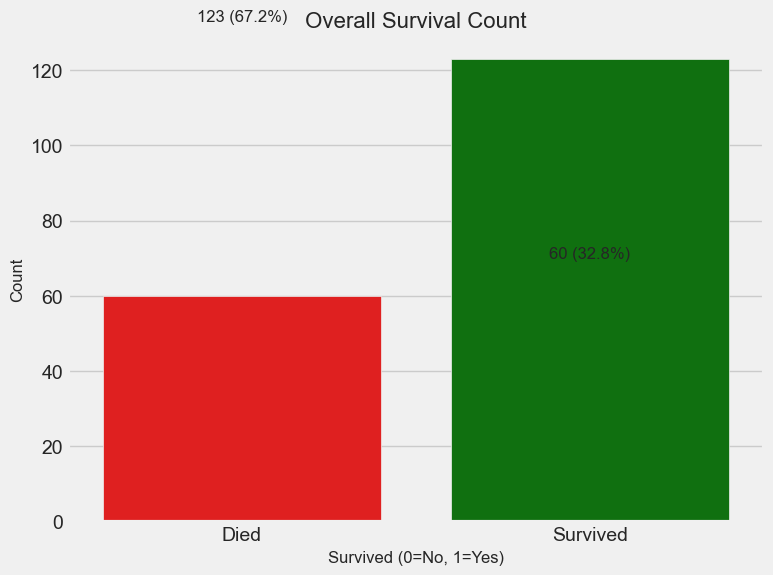

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette=['red', 'green'])
plt.title('Overall Survival Count', fontsize=16)
plt.xlabel('Survived (0=No, 1=Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Died', 'Survived'])
# Add count labels on top of bars
for i, count in enumerate(df['Survived'].value_counts()):
    plt.text(i, count + 10, f"{count} ({count/len(df)*100:.1f}%)", ha='center', fontsize=12)
    
plt.show()

## **2: Survival by Gender**


Survival rate by gender:
Sex
female    93.181818
male      43.157895
Name: Survived, dtype: float64


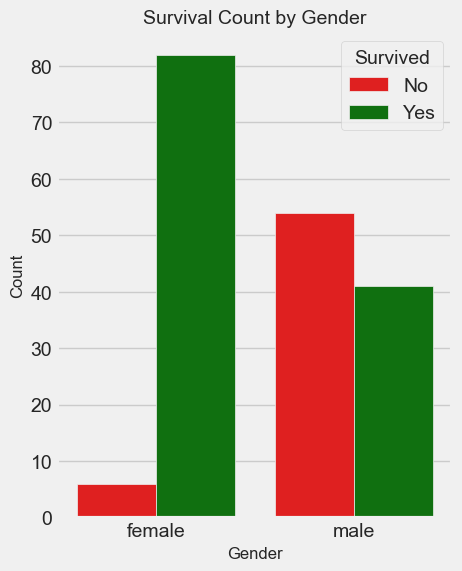

In [52]:
print("\nSurvival rate by gender:")
gender_survival = df.groupby('Sex')['Survived'].mean().sort_values(ascending=False) * 100
print(gender_survival)

# Visualize survival by gender
plt.figure(figsize=(10, 6))


# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

## **Percentage plot for Gender Based Suvival Analysis**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\2366170699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, palette=['lightblue', 'pink'])


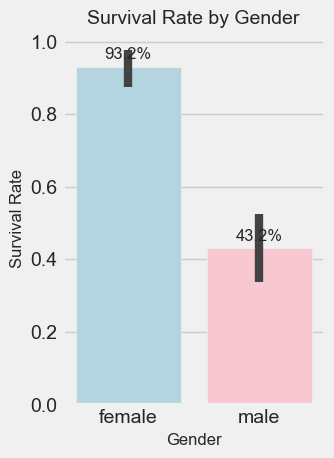

In [53]:
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=df, palette=['lightblue', 'pink'])
plt.title('Survival Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i, rate in enumerate(gender_survival):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()


## **3. Survival by passenger class**


Survival rate by passenger class:
Pclass
2    80.000000
1    67.088608
3    50.000000
Name: Survived, dtype: float64


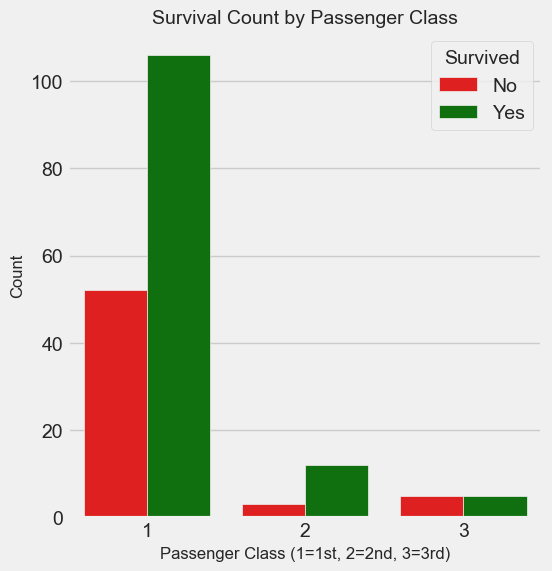

In [ ]:

print("\nSurvival rate by passenger class:")
class_survival = df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False) * 100
print(class_survival)

# Visualize survival by class
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Pclass', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Passenger Class', fontsize=14)
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

## **4. Survival by gender and class combined**


Survival rate by gender and class:
Pclass          1          2     3
Sex                               
female  95.945946  88.888889  60.0
male    41.666667  66.666667  40.0


Text(0, 0.5, 'Survival Rate')

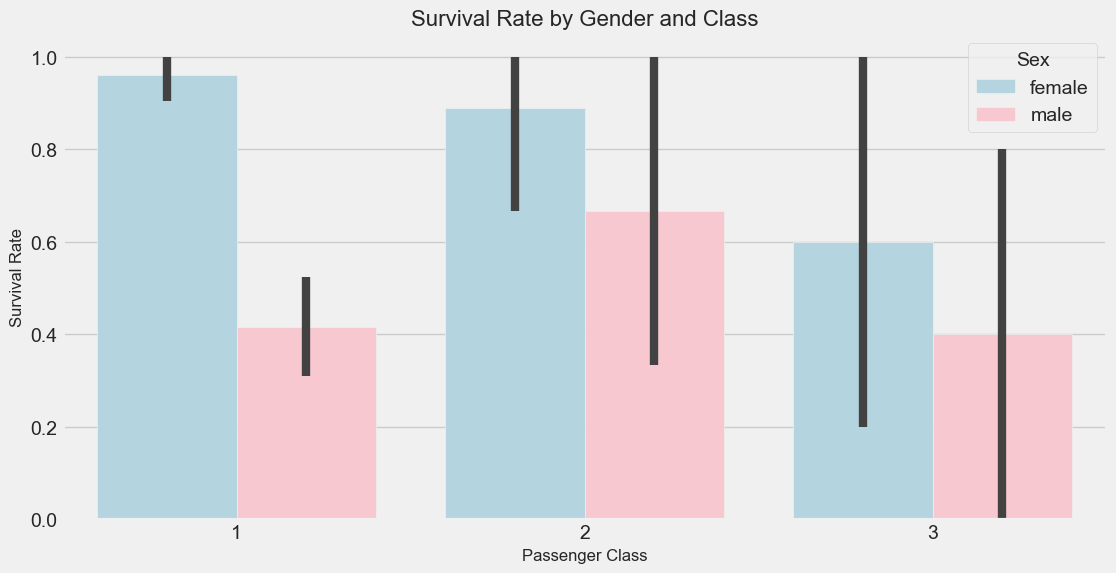

In [ ]:
print("\nSurvival rate by gender and class:")
gender_class_survival = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack() * 100
print(gender_class_survival)

# Visualize survival by gender and class
plt.figure(figsize=(12, 6))
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df, palette=['lightblue', 'pink'])
plt.title('Survival Rate by Gender and Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

## **Add percentage labels**

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\2661697344.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gender')
C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\2661697344.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


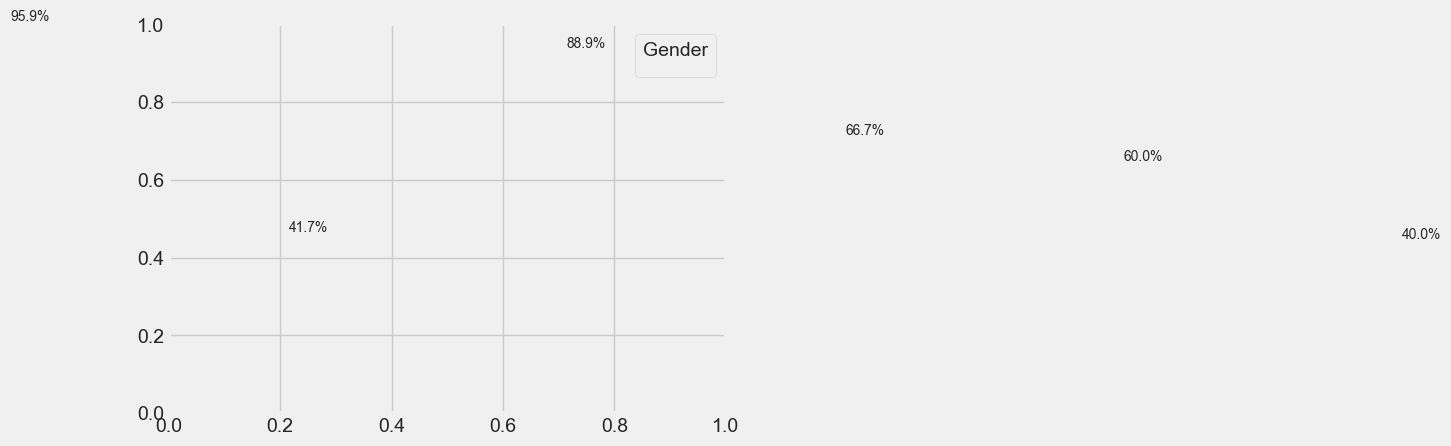

In [59]:

for i, sex in enumerate(['female', 'male']):
    for j, pclass in enumerate([1, 2, 3]):
        subset = df[(df['Sex'] == sex) & (df['Pclass'] == pclass)]
        rate = subset['Survived'].mean() * 100
        x_pos = j + (0.25 if i == 1 else -0.25)  # Adjust x position based on gender
        plt.text(x_pos, subset['Survived'].mean() + 0.05, f"{rate:.1f}%", ha='center', fontsize=10)

plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## **5. Survival by age groups**
## Create age groups


Survival rate by age group:
AgeGroup
Teenager       91.666667
Child          81.818182
Young Adult    76.119403
Adult          60.240964
Senior         20.000000
Name: Survived, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\1880371632.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False) * 100


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Child'),
  Text(1, 0, 'Teenager'),
  Text(2, 0, 'Young Adult'),
  Text(3, 0, 'Adult'),
  Text(4, 0, 'Senior')])

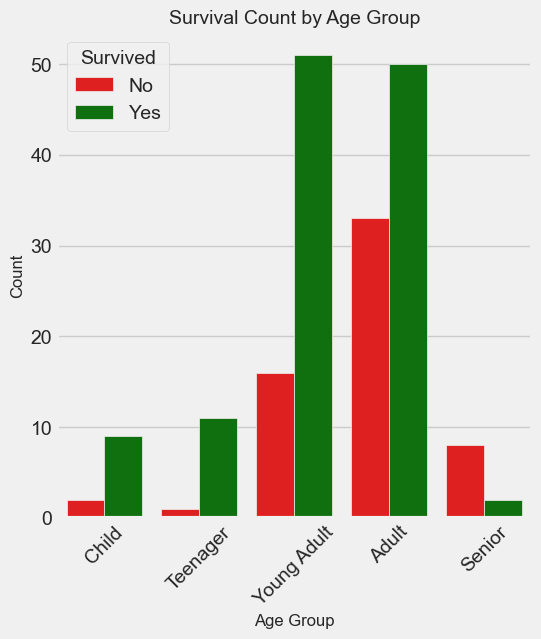

In [60]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

print("\nSurvival rate by age group:")
age_survival = df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False) * 100
print(age_survival)

# Visualize survival by age group
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.xticks(rotation=45)

## Percentage plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\1964075753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Greens_d')


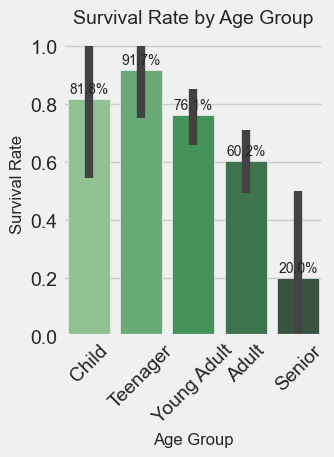

In [ ]:
plt.subplot(1, 2, 2)
sns.barplot(x='AgeGroup', y='Survived', data=df, palette='Greens_d')
plt.title('Survival Rate by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks(rotation=45)

# Add percentage labels
for i, rate in enumerate(age_survival.sort_index()):
    if not np.isnan(rate):  # Check if rate is not NaN
        plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## **6. Survival by embarkation port**


Survival rate by embarkation port:
Embarked
C    73.846154
S    63.793103
Q    50.000000
Name: Survived, dtype: float64


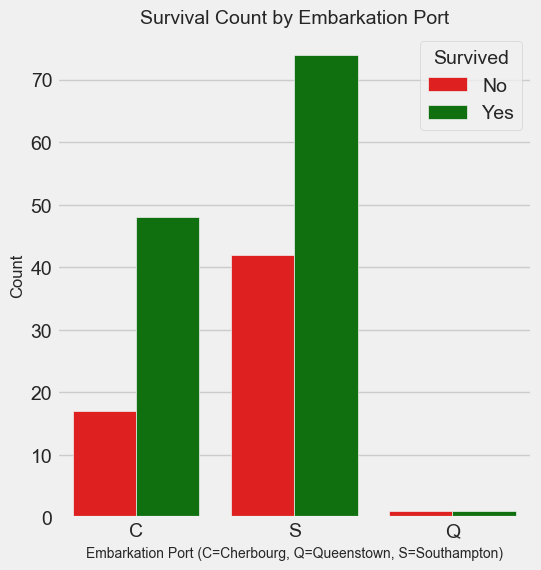

In [62]:
print("\nSurvival rate by embarkation port:")
port_survival = df.groupby('Embarked')['Survived'].mean().sort_values(ascending=False) * 100
print(port_survival)

# Visualize survival by embarkation port
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Embarked', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Embarkation Port', fontsize=14)
plt.xlabel('Embarkation Port (C=Cherbourg, Q=Queenstown, S=Southampton)', fontsize=10)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

## Percentage plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\1809037036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette='Purples_d')


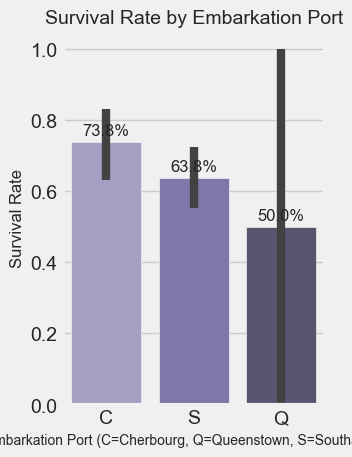

In [ ]:
plt.subplot(1, 2, 2)
sns.barplot(x='Embarked', y='Survived', data=df, palette='Purples_d')
plt.title('Survival Rate by Embarkation Port', fontsize=14)
plt.xlabel('Embarkation Port (C=Cherbourg, Q=Queenstown, S=Southampton)', fontsize=10)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i, port in enumerate(port_survival.index):
    if not pd.isna(port):  # Check if port is not NaN
        rate = port_survival[port]
        plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## **7. Create family size feature and analyze survival**


Survival rate by family size:
FamilySize
5    100.000000
4     77.777778
2     72.131148
3     71.428571
1     60.759494
6     50.000000
Name: Survived, dtype: float64


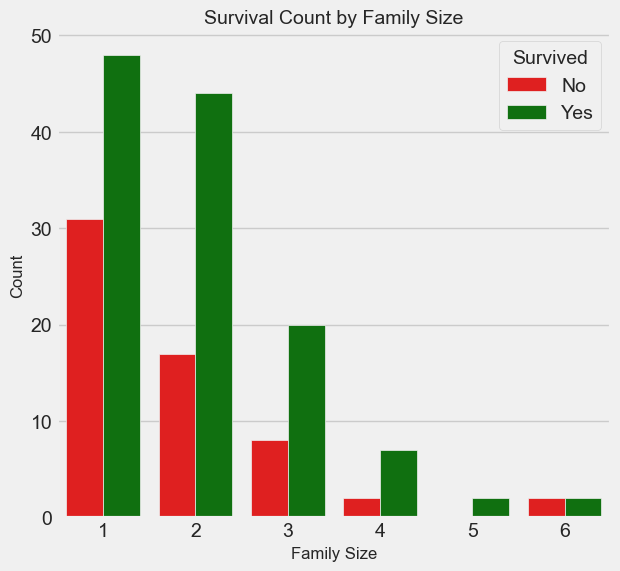

In [64]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 includes the passenger

print("\nSurvival rate by family size:")
family_survival = df.groupby('FamilySize')['Survived'].mean().sort_values(ascending=False) * 100
print(family_survival)

# Visualize survival by family size
plt.figure(figsize=(14, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='FamilySize', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Family Size', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

## Percentage plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\1441855172.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, palette='Oranges_d')


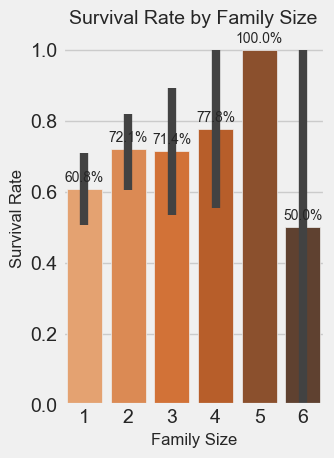

In [65]:
plt.subplot(1, 2, 2)
sns.barplot(x='FamilySize', y='Survived', data=df, palette='Oranges_d')
plt.title('Survival Rate by Family Size', fontsize=14)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i, size in enumerate(sorted(df['FamilySize'].unique())):
    rate = df[df['FamilySize'] == size]['Survived'].mean() * 100
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## **8. Fare analysis**
# Create fare categories


Survival rate by fare category:
FareCategory
High           75.555556
Medium-High    73.333333
Medium-Low     63.043478
Low            57.446809
Name: Survived, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\814556267.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = df.groupby('FareCategory')['Survived'].mean().sort_values(ascending=False) * 100


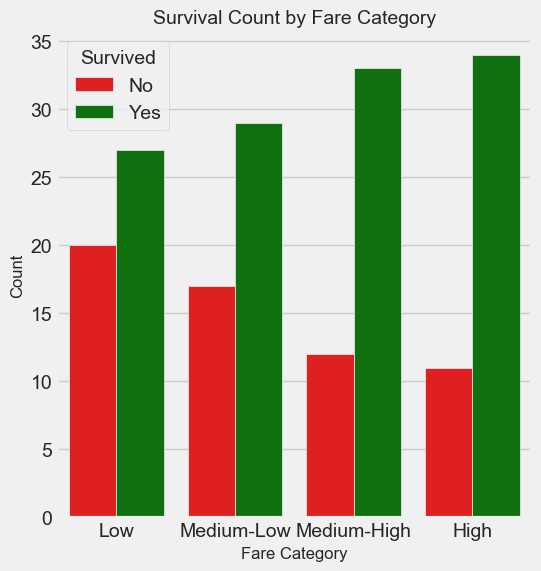

In [ ]:
df['FareCategory'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

print("\nSurvival rate by fare category:")
fare_survival = df.groupby('FareCategory')['Survived'].mean().sort_values(ascending=False) * 100
print(fare_survival)

# Visualize survival by fare category
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='FareCategory', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Fare Category', fontsize=14)
plt.xlabel('Fare Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

## Percentage plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\652943599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FareCategory', y='Survived', data=df, palette='Reds_d')


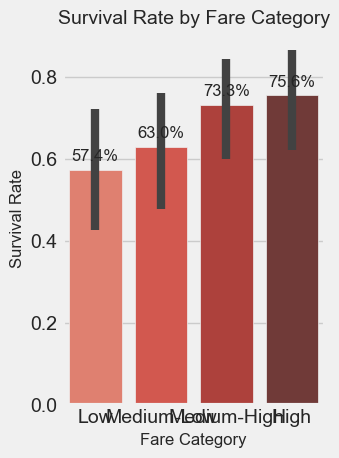

In [67]:
plt.subplot(1, 2, 2)
sns.barplot(x='FareCategory', y='Survived', data=df, palette='Reds_d')
plt.title('Survival Rate by Fare Category', fontsize=14)
plt.xlabel('Fare Category', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i, rate in enumerate(fare_survival.sort_index()):
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

## **9. Correlation heatmap of numerical variables**

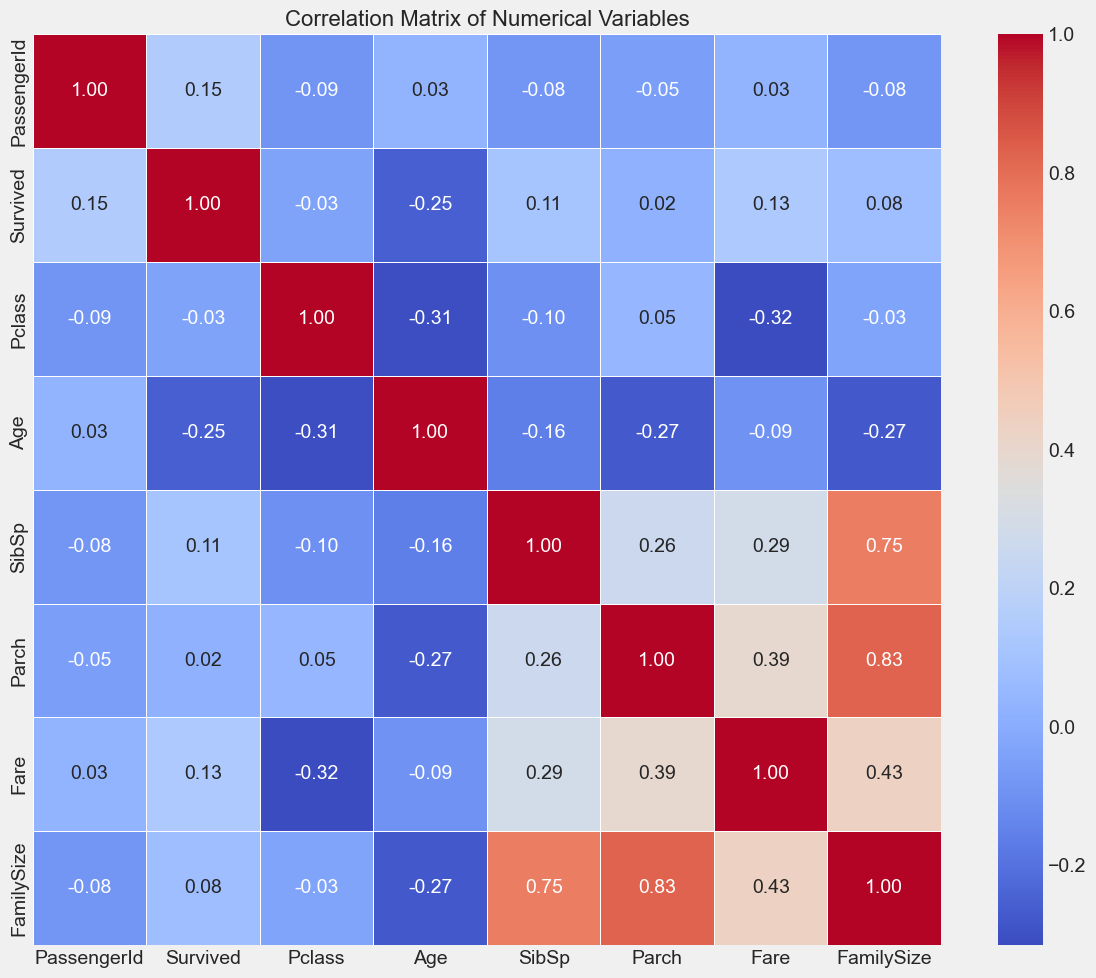

In [68]:
plt.figure(figsize=(12, 10))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

## **10. Age distribution by survival status**

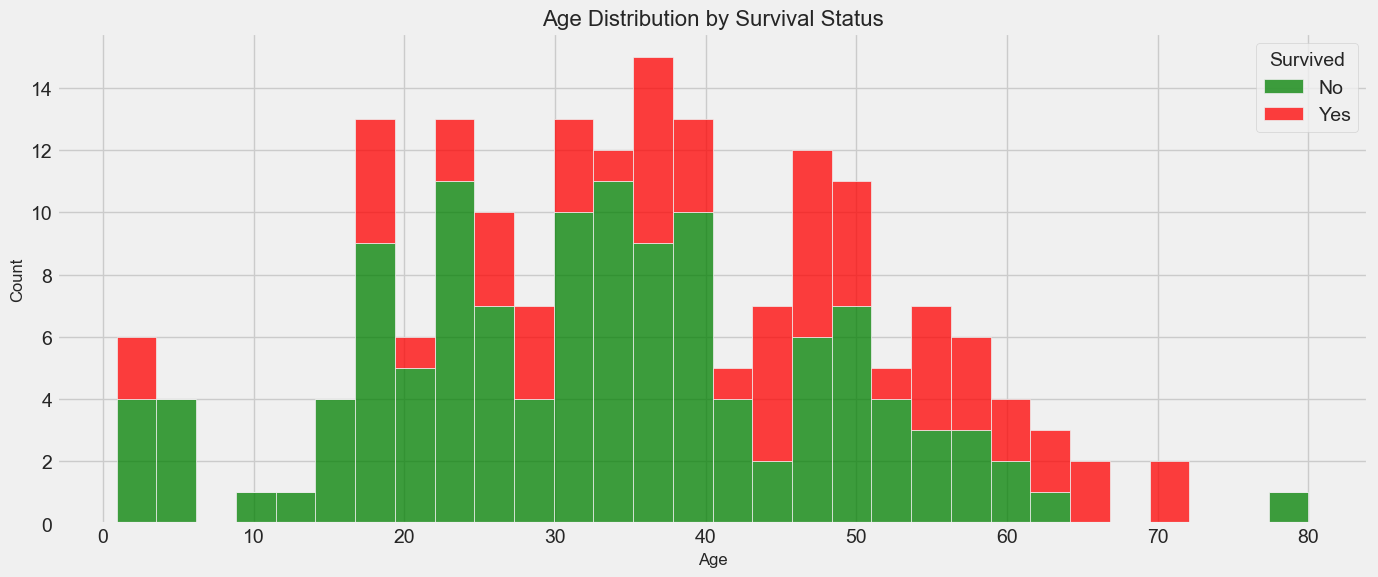

In [69]:
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, palette=['red', 'green'])
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


## **11. Survival by title (extracted from Name)**
## Extract titles from names


Survival rate by title:
Title
Master    100.000000
Miss       93.478261
Mrs        92.307692
Rare       70.000000
Mr         37.037037
Name: Survived, dtype: float64


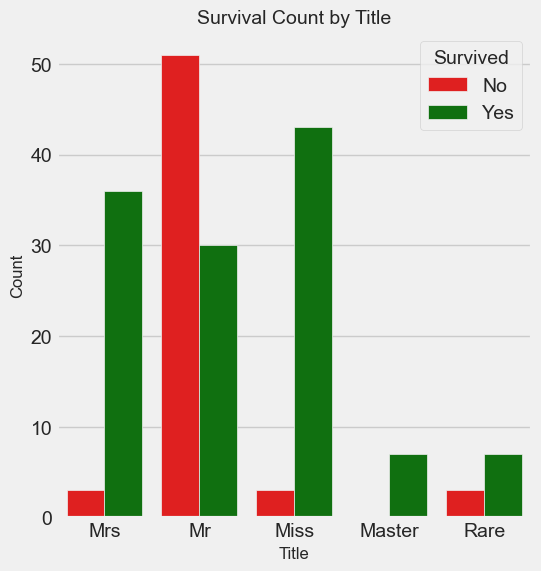

In [70]:

df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Group rare titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Countess': 'Rare',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Jonkheer': 'Rare',
    'Don': 'Rare',
    'Dona': 'Rare',
    'Mme': 'Mrs',
    'Capt': 'Rare',
    'Sir': 'Rare'
}

df['Title'] = df['Title'].map(title_mapping)

print("\nSurvival rate by title:")
title_survival = df.groupby('Title')['Survived'].mean().sort_values(ascending=False) * 100
print(title_survival)

# Visualize survival by title
plt.figure(figsize=(12, 6))

# Count plot
plt.subplot(1, 2, 1)
sns.countplot(x='Title', hue='Survived', data=df, palette=['red', 'green'])
plt.title('Survival Count by Title', fontsize=14)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])

## Percentage plot

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8600\304149250.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Title', y='Survived', data=df, palette='viridis')


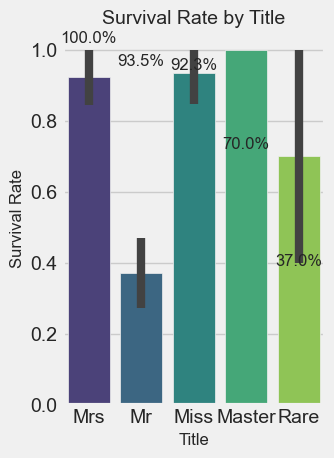

In [ ]:
plt.subplot(1, 2, 2)
sns.barplot(x='Title', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Title', fontsize=14)
plt.xlabel('Title', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Add percentage labels
for i, title in enumerate(title_survival.index):
    rate = title_survival[title]
    plt.text(i, rate/100 + 0.02, f"{rate:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [72]:


# 12. Summary of key findings
print("\n----- SUMMARY OF KEY FINDINGS -----")
print("1. Overall survival rate: {:.2f}%".format(survival_rate))
print("2. Women had a much higher survival rate ({:.2f}%) than men ({:.2f}%)".format(
    df[df['Sex'] == 'female']['Survived'].mean() * 100,
    df[df['Sex'] == 'male']['Survived'].mean() * 100))
print("3. Passengers in 1st class had the highest survival rate ({:.2f}%)".format(
    df[df['Pclass'] == 1]['Survived'].mean() * 100))
print("4. Children (0-12) had a higher survival rate ({:.2f}%) compared to other age groups".format(
    df[df['AgeGroup'] == 'Child']['Survived'].mean() * 100))
print("5. Passengers who embarked from Cherbourg (C) had the highest survival rate ({:.2f}%)".format(
    df[df['Embarked'] == 'C']['Survived'].mean() * 100))
print("6. Passengers with titles 'Mrs' and 'Miss' had the highest survival rates")
print("7. Passengers who paid higher fares had better chances of survival")
print("8. Family size affected survival rates, with medium-sized families (2-4 members) having better chances")


----- SUMMARY OF KEY FINDINGS -----
1. Overall survival rate: 67.21%
2. Women had a much higher survival rate (93.18%) than men (43.16%)
3. Passengers in 1st class had the highest survival rate (67.09%)
4. Children (0-12) had a higher survival rate (81.82%) compared to other age groups
5. Passengers who embarked from Cherbourg (C) had the highest survival rate (73.85%)
6. Passengers with titles 'Mrs' and 'Miss' had the highest survival rates
7. Passengers who paid higher fares had better chances of survival
8. Family size affected survival rates, with medium-sized families (2-4 members) having better chances
